\begin{center} 
Chun-Yuan (Scott) Chiu 
\end{center}
\begin{center} 
chunyuac@andrew.cmu.edu 
\end{center}

# 1. {-}

In [2]:
!pip install pandas_datareader

     |████████████████████████████████| 107 kB 4.0 MB/s eta 0:00:01


In [2]:
import os
import sys
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import statsmodels as smm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns


In [10]:

def tsplot(y, lags=None, figsize = (10,8), style = 'bmh', title=None):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan = 2)
        acf_ax = plt.subplot2grid(layout, (1,1))
        qq_ax = plt.subplot2grid(layout, (1,0))
        y.plot(ax = ts_ax)
        ts_ax.set_title(title)
        smt.graphics.plot_acf(y, lags = lags, ax=acf_ax,alpha = 0.05)
        sm.qqplot(y, line = 's', ax=qq_ax)
        qq_ax.set_title('QQ PLot')
        plt.tight_layout()
    return


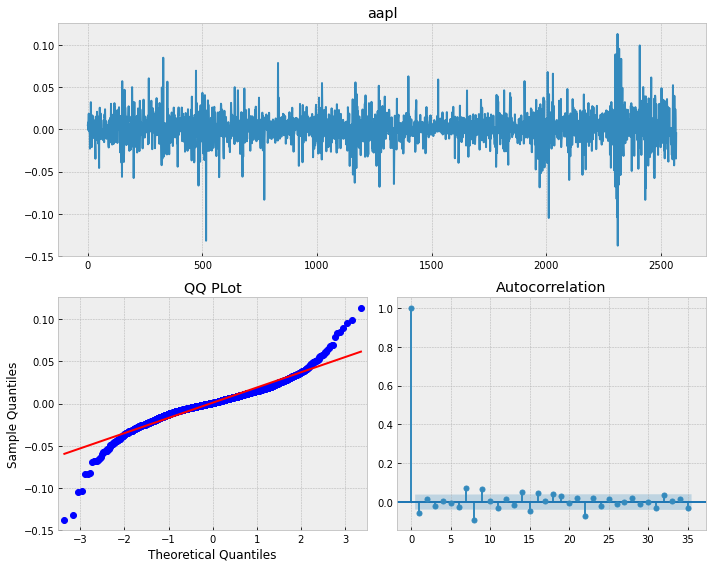

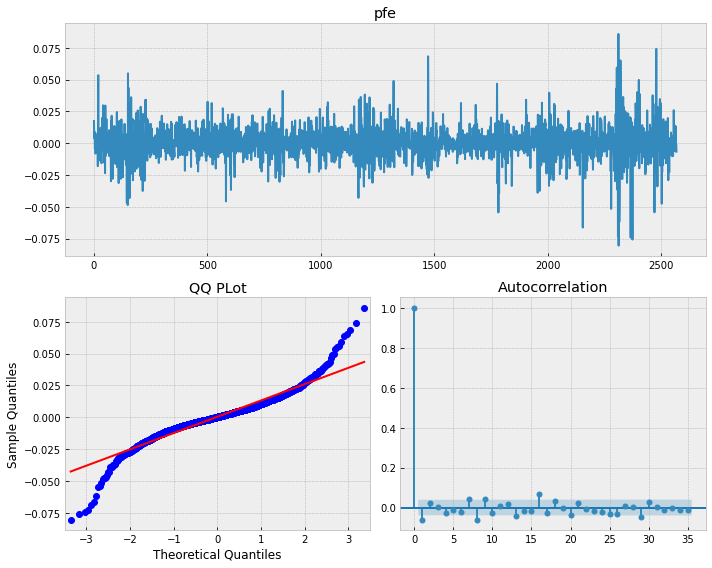

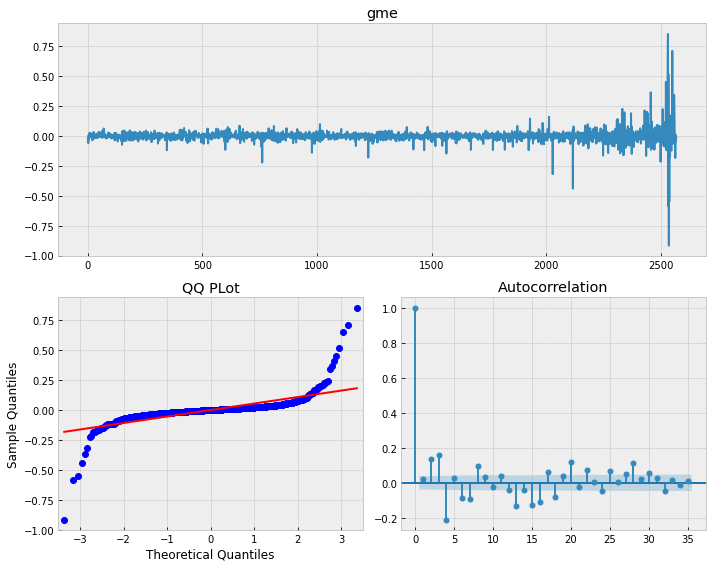

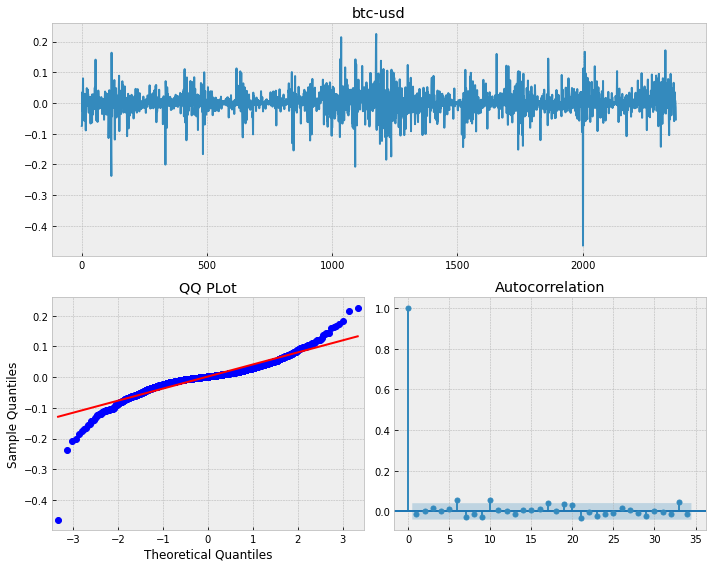

In [12]:
for ticker in ['aapl', 'pfe', 'gme', 'btc-usd']:
    start = '2011-01-01'
    end = '2021-03-21'
    price = pdr.get_data_yahoo(ticker,start,end)
    adjclose = price['Adj Close']
    shf = 1
    logret = np.log(adjclose/adjclose.shift(shf)).dropna()
    L = len(logret)
    LL = int(L/shf)
    logret_shf = np.zeros(LL)
    for i in range(int(L/shf)):
        logret_shf[i] = logret[i*shf]

    tsplot(logret_shf, title=ticker)
    plt.show()

# 2. {-}

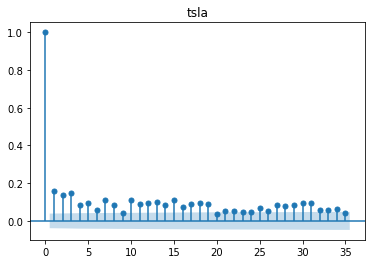

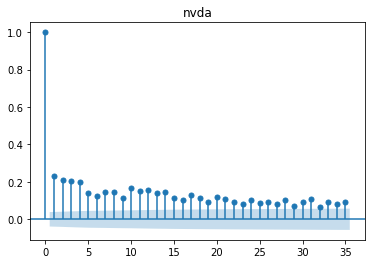

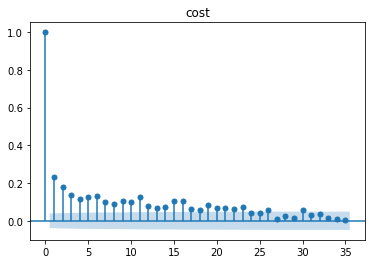

In [5]:
for ticker in ['tsla', 'nvda', 'cost']:
    start = '2011-01-01'
    end = '2021-03-21'
    price = pdr.get_data_yahoo(ticker,start,end)
    adjclose = price['Adj Close']
    shf = 1
    logret = np.log(adjclose/adjclose.shift(shf)).dropna()
    L = len(logret)
    LL = int(L/shf)
    logret_shf = np.zeros(LL)
    for i in range(int(L/shf)):
        logret_shf[i] = logret[i*shf]
    smt.graphics.plot_acf(np.abs(logret_shf), title=ticker, alpha = 0.05)


In [2]:
import numpy as np

class context:
    def __enter__(self):
        pass
    
    def __exit__(self, exc_type=None, exc_value=None, traceback=None):
        pass
    
with context():
    from pandas import DataFrame
    print(DataFrame(np.arange(20).reshape(4, 5)))

print(DataFrame(np.arange(20).reshape(4, 5)))    

    0   1   2   3   4
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19
    0   1   2   3   4
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19
